In [6]:
from matplotlib import animation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from evaluatiemetrieken import *

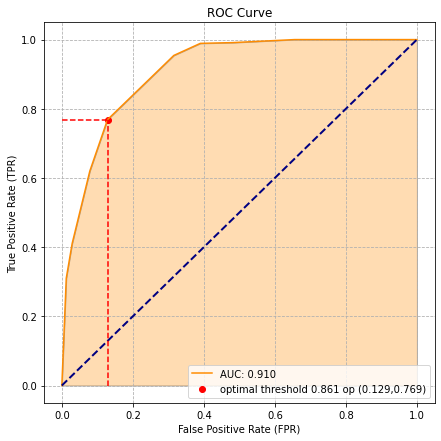

In [7]:
# gegevens inlezen
biopsy = pd.read_csv('../datasets/biopsy.csv')
# LDA model fitten op slechts 1 van de 9 inputs en target
X = biopsy[['V1']]
y = biopsy['class']

lda = LinearDiscriminantAnalysis()
lda.fit(X,y)
# y_scores bepalen volgens LDA model
lda.predict_proba(X)

# y_true is gewoon y
y_true = y # [0 if v == 'malignant' else 1 for v in y]
y_score = lda.predict_proba(X)[:,0]

# ROC curve plotten met eigen functie
plot_roc(y_true, y_score, pos_label='benign')

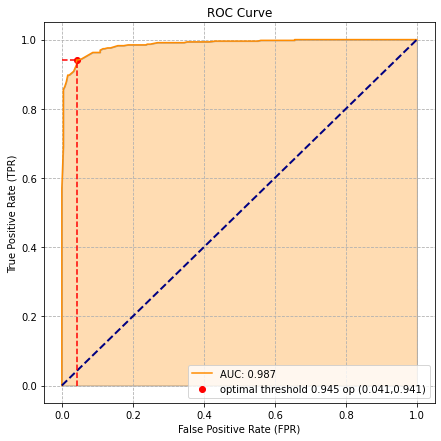

In [8]:
# gegevens inlezen
biopsy = pd.read_csv('../datasets/biopsy.csv')
# LDA model fitten op slechts 2 van de 9 inputs en target
X = biopsy[['V1','V2']]
y = biopsy['class']

lda = LinearDiscriminantAnalysis()
lda.fit(X,y)
# y_scores bepalen volgens LDA model
lda.predict_proba(X)

# y_true is gewoon y
y_true = y
y_score = lda.predict_proba(X)[:,0]

# ROC curve plotten met eigen functie
plot_roc(y_true, y_score, pos_label='benign')

In [9]:
from sklearn.metrics import confusion_matrix
from IPython.core.display import display
y_true = ['K','G','G','K','G','G','G','G','K','G']
y_pred = ['K','G','K','K','G','G','K','K','K','K']
labels = ['G','K']

cm = pd.DataFrame(confusion_matrix(y_true, y_pred, labels=['K','G']), columns=labels, index=labels)
display(cm)
display(accuracy(cm))
display(precision(cm,weighted=False))
display(recall(cm, weighted=False))
display(fmeasure(cm, weighted=False))

C:\Users\deketelw\AppData\Local\Temp\ipykernel_4024\438202131.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


G  K
G  3  0
K  4  3

Accuracy
Total       0.6

Precision
G   0.428571
K   1.000000

Recall
G  1.000000
K  0.428571

F1
G  0.6
K  0.6

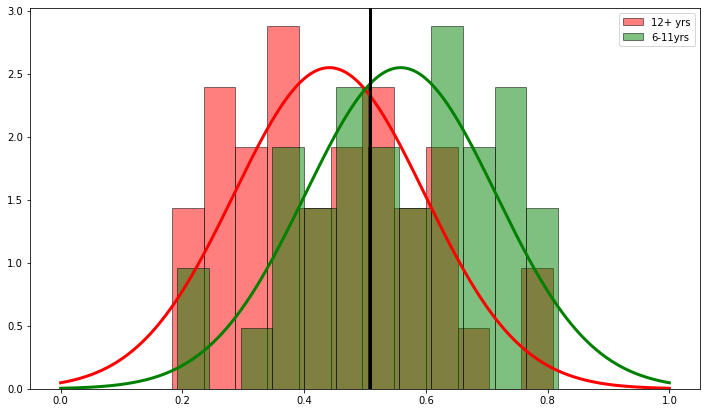

In [10]:
from scipy.stats import norm
education = pd.read_csv('../datasets/education_roc1.csv')

fig, ax = plt.subplots(figsize=(12,7))
x = np.linspace(0,1,500)

threshold = 0.509

for value, color, alpha in zip(np.unique(education.y_true), ['red','green'], [0.5, 0.5]):
  scores = education.query("y_true == '6-11yrs'")[value]
  verdeling = norm(loc=scores.mean(), scale=scores.std())
  ax.hist(scores, density=True, bins=12, color=color, edgecolor='black', alpha=alpha, label=value)
  ax.plot(x, verdeling.pdf(x), color=color, linewidth=3)
  ax.axvline(x=threshold, color='black',linewidth=3)
  ax.legend()

y_pred   12+ yrs  6-11yrs
y_true                   
12+ yrs       81       35
6-11yrs       42       78

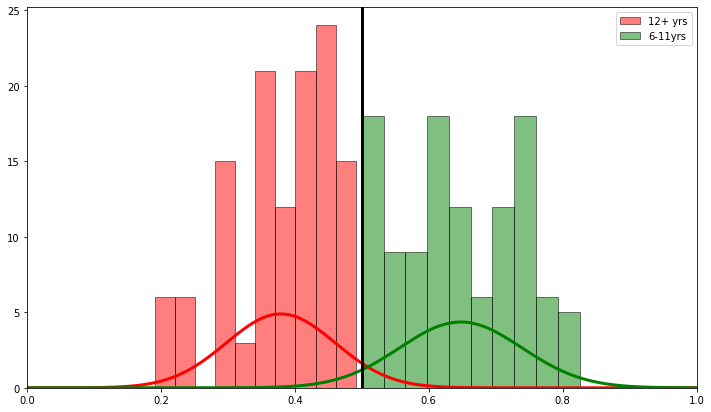

In [17]:
fig, ax = plt.subplots(figsize=(12,7))
x = np.linspace(0,1,500)
ax.set_xlim((0,1))
colors = {'6-11yrs': 'green', '12+ yrs':'red'}
threshold = 0.5
# gebruik threshold om de voorspelling te doen
education['y_pred'] = education.apply(lambda row: '6-11yrs' if row['6-11yrs'] > threshold else '12+ yrs', axis=1)

for value, alpha in zip(np.unique(education.y_pred), [0.5, 0.5]):
      color = colors[value]
      scores = education[education.y_pred == value]['6-11yrs']
      verdeling = norm(loc=scores.mean(), scale=scores.std())
      ax.hist(scores, density=False, color=color, edgecolor='black', alpha=alpha, label=value)
      ax.plot(x, verdeling.pdf(x), color=color,linewidth=3)
      ax.axvline(x=threshold, color='black', linewidth=3)

ax.legend()

pd.crosstab(education.y_true, education.y_pred)

MovieWriter imagemagick unavailable; using Pillow instead.
c:\users\deketelw\.virtualenvs\data-science\lib\site-packages\scipy\stats\_distn_infrastructure.py:1904: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\users\deketelw\.virtualenvs\data-science\lib\site-packages\scipy\stats\_distn_infrastructure.py:1904: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\users\deketelw\.virtualenvs\data-science\lib\site-packages\scipy\stats\_distn_infrastructure.py:1904: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\users\deketelw\.virtualenvs\data-science\lib\site-packages\scipy\stats\_distn_infrastructure.py:1904: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
c:\users\deketelw\.virtualenvs\data-science\lib\site-packages\scipy\stats\_distn_infrastructure.py:1904: 

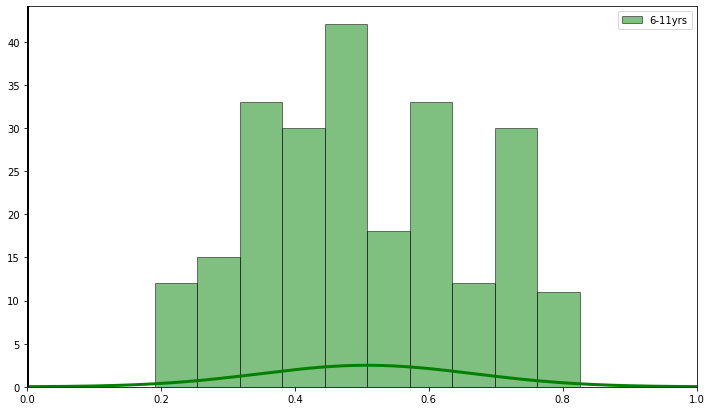

In [12]:
fig, ax = plt.subplots(figsize=(12,7))

x = np.linspace(0,1,500)
colors = {'6-11yrs': 'green', '12+ yrs':'red'}

def animate(threshold):
    if threshold > 1:
          threshold = 2 - threshold
    ax.clear()
    plt.cla()
    ax.set_xlim((0,1))
    # compute new mapping for this threshold
    education['y_pred'] = education.apply(lambda row: '6-11yrs' if row['6-11yrs'] > threshold else '12+ yrs', axis=1)

    for value, alpha in zip(np.unique(education.y_pred), [0.5, 0.5]):
          color = colors[value]
          scores = education[education.y_pred == value]['6-11yrs']
          verdeling = norm(loc=scores.mean(), scale=scores.std())
          ax.hist(scores, density=False, color=color, edgecolor='black', alpha=alpha, label=value)
          ax.plot(x, verdeling.pdf(x), color=color,linewidth=3)
          ax.axvline(x=threshold, color='black', linewidth=3)

    ax.legend()
    return []

# call the animator
anim = animation.FuncAnimation(fig, animate, frames=np.linspace(0,2,200), interval=100, blit=True)

# save the animation as mp4 video file
anim.save('eval.gif', writer='imagemagick')